## Bibliotecas

In [2]:
#Criação dos dados
import pandas as pd
import numpy as np

#Redes Neurais
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from keras.optimizers import Adam

#Plotagem e funções matemáticas
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import math
import random
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 

# QUESTÃO 1

### CLASSE PERCEPTRON

In [ ]:
# Função de ativação degrau
def step_function(x):
    return np.where(x >= 0, 1, -1)

# Função para treinar o perceptron
def train_perceptron(X, y, learning_rate=0.1, epochs=50):
    num_features = X.shape[1]
    num_classes = y.shape[1]

    # Inicialização dos pesos e bias
    weights = np.random.rand(num_features, num_classes)
    bias = np.random.rand(num_classes)

    for epoch in range(epochs):
        for i in range(len(X)):
            # Propagação para frente
            activation = np.dot(X[i], weights) + bias
            output = step_function(activation)

            # Atualização dos pesos e bias
            weights += learning_rate * np.outer(X[i], (y[i] - output))
            bias += learning_rate * (y[i] - output)

        # Calcular a precisão na época atual
        predictions = predict_perceptron(X, weights, bias)
        accuracy = np.mean(predictions == y)
        
        # Imprimir a precisão na época atual
        print(f"Epoch {epoch+1}/{epochs} - Accuracy: {accuracy}")

    return weights, bias

# Função para prever com o perceptron treinado
def predict_perceptron(X, weights, bias):
    activation = np.dot(X, weights) + bias
    return step_function(activation)

### Data

In [ ]:
def generate_data(num_points_per_class):
    patterns = [
        ([0, 0, 0], [1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0]),
        ([0, 0, 1], [-1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0]),
        ([0, 1, 0], [-1.0, -1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0]),
        ([0, 1, 1], [-1.0, -1.0, -1.0, 1.0, -1.0, -1.0, -1.0, -1.0]),
        ([1, 0, 0], [-1.0, -1.0, -1.0, -1.0, 1.0, -1.0, -1.0, -1.0]),
        ([1, 0, 1], [-1.0, -1.0, -1.0, -1.0, -1.0, 1.0, -1.0, -1.0]),
        ([1, 1, 0], [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, -1.0]),
        ([1, 1, 1], [-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0])
    ]

    data = []
    labels = []

    for pattern, label in patterns:
        for _ in range(num_points_per_class):
            noise = np.random.normal(0, 0.1, 3)
            point = np.array(pattern) + noise
            data.append(point)
            labels.append(label)

    return np.array(data), np.array(labels)

# Gerar 1000 pontos para cada classe
X_train, y_train = generate_data(1000)

# Dividir o conjunto de treinamento em treinamento e validação (80% para treinamento e 20% para validação)
def train_validation_split(X, y, validation_ratio=0.2):
    num_samples = len(X)
    indices = np.arange(num_samples)
    np.random.shuffle(indices)
    split_index = int((1 - validation_ratio) * num_samples)
    train_indices, val_indices = indices[:split_index], indices[split_index:]
    return X[train_indices], y[train_indices], X[val_indices], y[val_indices]

X_train, y_train, X_val, y_val = train_validation_split(X_train, y_train)

print("Tamanho dos dados de treinamento:", X_train.shape)
print("Tamanho dos rótulos de treinamento:", y_train.shape)
print("Tamanho dos dados de validação:", X_val.shape)
print("Tamanho dos rótulos de validação:", y_val.shape)

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

colors = ['r', 'g', 'b', 'y', 'c', 'm', 'k', 'orange']

for i in range(8):
    points = X_train[y_train[:, i] == 1]
    ax.scatter(points[:, 0], points[:, 1], points[:, 2], c=colors[i], label=f'Padrão {i+1}', alpha=0.7, s=50)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Padrões nos Vértices do Cubo')
ax.legend()

# Defina a mesma escala nos três eixos para evitar distorções
ax.set_box_aspect([1,1,1])

plt.show()

In [ ]:
# Treinar o perceptron
weights, bias = train_perceptron(X_train, y_train)

# Testar o perceptron
X_test, y_test = generate_data(num_points_per_class=10)
predictions = predict_perceptron(X_test, weights, bias)

# Avaliar a precisão
accuracy = np.mean(predictions == y_test)
print("Accuracy:", accuracy)

### Treino e Validação

# QUESTÃO 2

## XOR

## CRIAÇÃO DOS DADOS

In [48]:
X = np.array([[0,0],[0,1],[1,0],[1,1]], "float32")
y = np.array([[0],[1],[1],[0]], "float32")

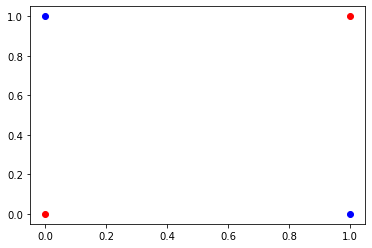

In [49]:
for i in range(len(X)):
    if(X[i][0] == 0 and X[i][1] == 0 or X[i][0] == 1 and X[i][1] == 1):
        plt.scatter(X[i][0], X[i][1], c='red')
    else:
        plt.scatter(X[i][0], X[i][1], c='blue')

## PARÂMETROS

In [50]:
n = 20 #Épocas
neurons = 10 #neurônios


## REDE NEURAL

In [51]:
model = Sequential()
model.add(Dense(neurons, activation='relu', input_dim=2))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer=Adam(lr=0.01), loss='mse', metrics=['binary_accuracy'])

In [52]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 10)                30        
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 11        
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [53]:
xor_hist = model.fit(X, y, epochs=n)

Epoch 1/20
1/1 [==============================] - 0s 193ms/step - loss: 0.2521 - binary_accuracy: 0.7500
Epoch 2/20
1/1 [==============================] - 0s 996us/step - loss: 0.2501 - binary_accuracy: 0.5000
Epoch 3/20
1/1 [==============================] - 0s 997us/step - loss: 0.2484 - binary_accuracy: 0.5000
Epoch 4/20
1/1 [==============================] - 0s 997us/step - loss: 0.2474 - binary_accuracy: 0.5000
Epoch 5/20
1/1 [==============================] - 0s 997us/step - loss: 0.2464 - binary_accuracy: 0.5000
Epoch 6/20
1/1 [==============================] - 0s 2ms/step - loss: 0.2459 - binary_accuracy: 0.7500
Epoch 7/20
1/1 [==============================] - 0s 997us/step - loss: 0.2450 - binary_accuracy: 0.7500
Epoch 8/20
1/1 [==============================] - 0s 2ms/step - loss: 0.2440 - binary_accuracy: 0.7500
Epoch 9/20
1/1 [==============================] - 0s 996us/step - loss: 0.2428 - binary_accuracy: 0.7500
Epoch 10/20
1/1 [==============================] - 0s 2ms/s

## GRÁFICO DE PERDA POR ÉPOCA PARA XOR

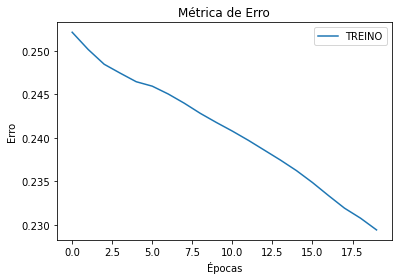

In [54]:
plt.plot(xor_hist.history['loss'])
plt.title('Métrica de Erro')
plt.xlabel('Épocas')
plt.ylabel('Erro')
plt.legend(['TREINO'])

## GRÁFICO DE ACURÁCIA POR ÉPOCA PARA XOR

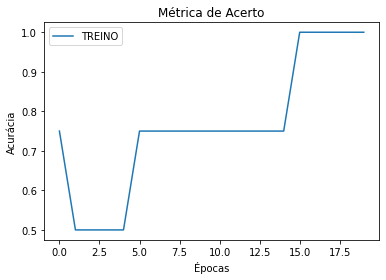

In [55]:
plt.plot(xor_hist.history['binary_accuracy'])
plt.title('Métrica de Acerto')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(['TREINO'])

## PREDIÇÃO

In [ ]:
print(model.predict(X).round())

### FUNÇÕES

In [22]:
def log10(x):
    return math.log(x,10)

def f(x):
    return round(10*(x**5) + 5*(x**4) + 2*(x**3) + -0.5*(x**2) + 3*x + 2,2)

## GRÁFICO DE log10(x)

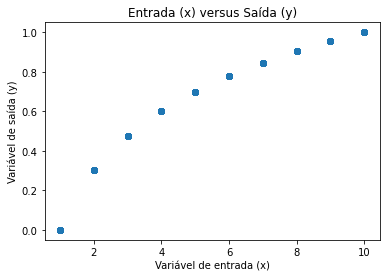

In [23]:
# define o dado de entrada
x_log = np.asarray([np.random.randint(1,11) for i in range(1000)])

# define o dado de saída
y_log = np.asarray([log10(i) for i in x_log])

# plota o gráfico de y(x)
plt.scatter(x_log,y_log)
plt.title('Entrada (x) versus Saída (y)')
plt.xlabel('Variável de entrada (x)')
plt.ylabel('Variável de saída (y)')
plt.show()

## GRÁFICO DE f(x)

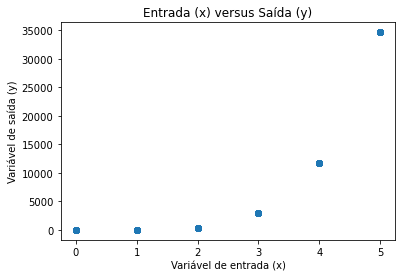

In [24]:
# define o dado de entrada
x_f = np.asarray([np.random.randint(0,6) for i in range(1000)])

# define o dado de saída
y_f = np.asarray([f(i) for i in x_f])

# plota o gráfico de y(x)
plt.scatter(x_f,y_f)
plt.title('Entrada (x) versus Saída (y)')
plt.xlabel('Variável de entrada (x)')
plt.ylabel('Variável de saída (y)')
plt.show()

## TAMANHO DO TREINO E TESTE

In [25]:
len_teste_f = int(len(x_f)*0.20) #20% para teste
len_treino_f = len(x_f) - len_teste_f

len_teste_log = int(len(x_log)*0.20) #20% para teste
len_treino_log = len(x_log) - len_teste_log

In [26]:
print(f'Treino = {len_treino_f}\nTeste = {len_teste_f}')

Treino = 800
Teste = 200


## SEPARAÇÃO DE TREINO E TESTE

In [27]:
X_treino_f = x_f[0:len_treino_f]
X_teste_f = x_f[len_treino_f:len(x_f)]

y_treino_f = y_f[0:len_treino_f]
y_teste_f = y_f[len_treino_f:len(x_f)]

X_treino_log = x_log[0:len_treino_log]
X_teste_log = x_log[len_treino_log:len(x_log)]

y_treino_log = y_log[0:len_treino_log]
y_teste_log = y_log[len_treino_log:len(x_log)]

## NORMALIZAÇÃO PARA f(x) e log10(x)

In [28]:
# Reformula X_treino_f, X_teste_f, X_treino_log, e X_teste_log
X_treino_f = X_treino_f.reshape(-1, 1)
X_teste_f = X_teste_f.reshape(-1, 1)
X_treino_log = X_treino_log.reshape(-1, 1)
X_teste_log = X_teste_log.reshape(-1, 1)

# Reformula y_treino_f, y_teste_f, y_treino_log, e y_teste_log
y_treino_f = y_treino_f.reshape(-1, 1)
y_teste_f = y_teste_f.reshape(-1, 1)
y_treino_log = y_treino_log.reshape(-1, 1)
y_teste_log = y_teste_log.reshape(-1, 1)

# Inicializa o MinMaxScaler
scale_x = MinMaxScaler()
scale_y = MinMaxScaler()

# Ajusta e transforma X_treino_f, X_teste_f, X_treino_log, e X_teste_log
X_treino_f = scale_x.fit_transform(X_treino_f)
X_teste_f = scale_x.transform(X_teste_f)
X_treino_log = scale_x.fit_transform(X_treino_log)
X_teste_log = scale_x.transform(X_teste_log)

# Ajusta e transforma y_treino_f, y_teste_f, y_treino_log, e y_teste_log
y_treino_f = scale_y.fit_transform(y_treino_f)
y_teste_f = scale_y.transform(y_teste_f)
y_treino_log = scale_y.fit_transform(y_treino_log)
y_teste_log = scale_y.transform(y_teste_log)


### REDE NEURAL

In [29]:
n = 200 #Épocas
b = 32 #Batch size
neurons = 64 #neurônios

In [30]:
model = Sequential()
model.add(Dense(10, activation='relu', input_dim=1))
model.add(Dense(neurons, activation='relu'))
model.add(Dense(1, activation='relu'))
model.compile(optimizer=Adam(lr=0.001), loss='mse', metrics=['mse'])

In [31]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 10)                20        
_________________________________________________________________
dense_10 (Dense)             (None, 64)                704       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 65        
Total params: 789
Trainable params: 789
Non-trainable params: 0
_________________________________________________________________


## MODELO PARA F

In [32]:
hist = model.fit(X_treino_f, y_treino_f, epochs=n, batch_size=b)

Epoch 1/200
25/25 [==============================] - 0s 567us/step - loss: 0.1381 - mse: 0.1381
Epoch 2/200
25/25 [==============================] - 0s 541us/step - loss: 0.0621 - mse: 0.0621
Epoch 3/200
25/25 [==============================] - 0s 622us/step - loss: 0.0572 - mse: 0.0572
Epoch 4/200
25/25 [==============================] - 0s 580us/step - loss: 0.0453 - mse: 0.0453
Epoch 5/200
25/25 [==============================] - 0s 622us/step - loss: 0.0358 - mse: 0.0358
Epoch 6/200
25/25 [==============================] - 0s 583us/step - loss: 0.0277 - mse: 0.0277
Epoch 7/200
25/25 [==============================] - 0s 581us/step - loss: 0.0234 - mse: 0.0234
Epoch 8/200
25/25 [==============================] - 0s 579us/step - loss: 0.0184 - mse: 0.0184
Epoch 9/200
25/25 [==============================] - 0s 539us/step - loss: 0.0166 - mse: 0.0166
Epoch 10/200
25/25 [==============================] - 0s 633us/step - loss: 0.0115 - mse: 0.0115
Epoch 11/200
25/25 [===================

## MODELO DE F COM VALIDAÇÃO

In [33]:
hist_2 = model.fit(X_treino_f, y_treino_f, epochs=n, batch_size=b, validation_split=0.2)

Epoch 1/200
20/20 [==============================] - 0s 6ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 2/200
20/20 [==============================] - 0s 2ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 3/200
20/20 [==============================] - 0s 2ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 4/200
20/20 [==============================] - 0s 2ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 5/200
20/20 [==============================] - 0s 2ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 6/200
20/20 [==============================] - 0s 2ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 7/200
20/20 [==============================] - 0s 2ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 8/200
20/20 [==============================] - 0s 2ms/step - loss: 0.0013 - m

## GRÁFICO DE PERDA POR ÉPOCA PARA F(x)

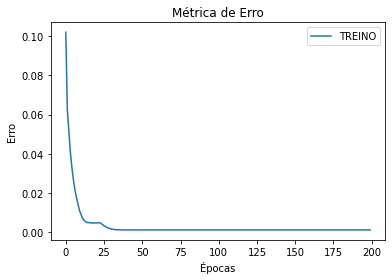

In [34]:
plt.plot(hist.history['loss'])
plt.title('Métrica de Erro')
plt.xlabel('Épocas')
plt.ylabel('Erro')
plt.legend(['TREINO'])

## GRÁFICO DE PERDA POR ÉPOCA PARA F

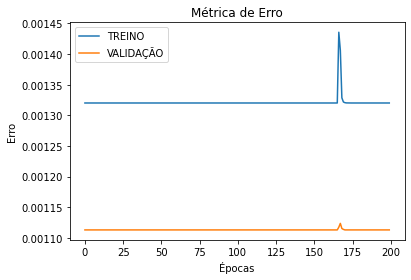

In [35]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Métrica de Erro')
plt.xlabel('Épocas')
plt.ylabel('Erro')
plt.legend(['TREINO', 'VALIDAÇÃO'])

## PREDIÇÃO

In [36]:
#FAZ PREDIÇÕES COM O MODELO PARA A FUNÇÃO f(x)
yhat = model.predict(X_teste_f)

## TRANFORMAÇÃO INVERSA DA NORMALIZAÇÃO

In [37]:
x_plot = scale_x.inverse_transform(X_teste_f)
y_plot = scale_y.inverse_transform(y_teste_f)
yhat_plot = scale_y.inverse_transform(yhat)

In [38]:
# ERRO DO MODELO
print('MSE: %.3f' % mean_squared_error(y_plot, yhat_plot))

MSE: 0.001


## APROXIMAÇÃO DA FUNÇÃO F

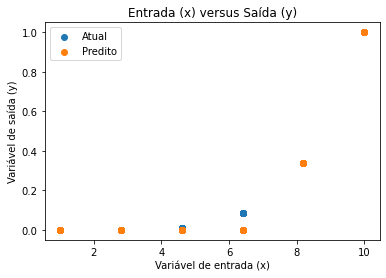

In [39]:
# plot x vs y
plt.scatter(x_plot,y_plot, label='Atual')

# plot x vs yhat
plt.scatter(x_plot,yhat_plot, label='Predito')

plt.title('Entrada (x) versus Saída (y)')
plt.xlabel('Variável de entrada (x)')
plt.ylabel('Variável de saída (y)')
plt.legend()
plt.show()

## MODELO PARA log10(x)

In [40]:
hist_log = model.fit(X_treino_log, y_treino_log, epochs=n, batch_size=b)

Epoch 1/200
25/25 [==============================] - 0s 718us/step - loss: 0.1461 - mse: 0.1461
Epoch 2/200
25/25 [==============================] - 0s 660us/step - loss: 0.0180 - mse: 0.0180
Epoch 3/200
25/25 [==============================] - 0s 707us/step - loss: 0.0027 - mse: 0.0027
Epoch 4/200
25/25 [==============================] - 0s 623us/step - loss: 6.7572e-04 - mse: 6.7572e-04
Epoch 5/200
25/25 [==============================] - 0s 623us/step - loss: 2.5267e-04 - mse: 2.5267e-04
Epoch 6/200
25/25 [==============================] - 0s 662us/step - loss: 1.2457e-04 - mse: 1.2457e-04
Epoch 7/200
25/25 [==============================] - 0s 631us/step - loss: 7.6278e-05 - mse: 7.6278e-05
Epoch 8/200
25/25 [==============================] - 0s 707us/step - loss: 5.1699e-05 - mse: 5.1699e-05
Epoch 9/200
25/25 [==============================] - 0s 623us/step - loss: 3.1047e-05 - mse: 3.1047e-05
Epoch 10/200
25/25 [==============================] - 0s 608us/step - loss: 2.4510e-05 -

## GRÁFICO DE PERDA POR ÉPOCA PARA FUNÇÃO LOG10(x)

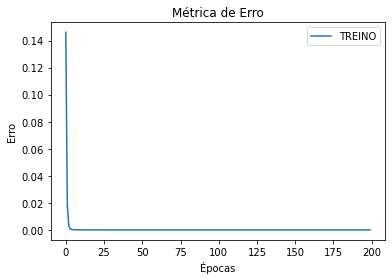

In [41]:
plt.plot(hist_log.history['loss'])
plt.title('Métrica de Erro')
plt.xlabel('Épocas')
plt.ylabel('Erro')
plt.legend(['TREINO'])

## MODELO DE LOG10(x) COM VALIDAÇÃO 

In [42]:
hist_log_2 = model.fit(X_treino_log, y_treino_log, epochs=n, batch_size=b, validation_split=0.2)

Epoch 1/200
20/20 [==============================] - 0s 3ms/step - loss: 1.4612e-06 - mse: 1.4612e-06 - val_loss: 5.4175e-07 - val_mse: 5.4175e-07
Epoch 2/200
20/20 [==============================] - 0s 2ms/step - loss: 1.0785e-06 - mse: 1.0785e-06 - val_loss: 1.0101e-06 - val_mse: 1.0101e-06
Epoch 3/200
20/20 [==============================] - 0s 2ms/step - loss: 1.1275e-06 - mse: 1.1275e-06 - val_loss: 7.8788e-07 - val_mse: 7.8788e-07
Epoch 4/200
20/20 [==============================] - 0s 2ms/step - loss: 8.9477e-07 - mse: 8.9477e-07 - val_loss: 5.2447e-07 - val_mse: 5.2447e-07
Epoch 5/200
20/20 [==============================] - 0s 2ms/step - loss: 1.3561e-06 - mse: 1.3561e-06 - val_loss: 1.0049e-06 - val_mse: 1.0049e-06
Epoch 6/200
20/20 [==============================] - 0s 2ms/step - loss: 1.2419e-06 - mse: 1.2419e-06 - val_loss: 1.8278e-06 - val_mse: 1.8278e-06
Epoch 7/200
20/20 [==============================] - 0s 2ms/step - loss: 1.8366e-06 - mse: 1.8366e-06 - val_loss: 3.70

## GRÁFICO DE PERDA POR ÉPOCA PARA LOG10(x) COM VALIDAÇÃO

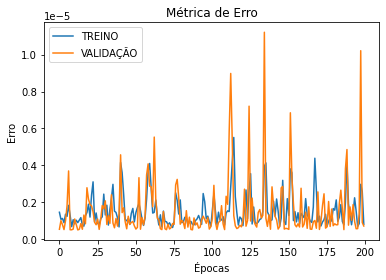

In [43]:
plt.plot(hist_log_2.history['loss'])
plt.plot(hist_log_2.history['val_loss'])
plt.title('Métrica de Erro')
plt.xlabel('Épocas')
plt.ylabel('Erro')
plt.legend(['TREINO', 'VALIDAÇÃO'])

## PREDIÇÃO

In [44]:
#FAZ PREDIÇÕES COM O MODELO PARA A FUNÇÃO log10(x)
yhat = model.predict(X_teste_log)

## TRANSFORMAÇÃO INVERSA DA NORMALIZAÇÃO

In [45]:
# inverse transforms
x_plot = scale_x.inverse_transform(X_teste_log)
y_plot = scale_y.inverse_transform(y_teste_log)
yhat_plot = scale_y.inverse_transform(yhat)

In [46]:
# ERRO DO MODELO
print('MSE: %.3f' % mean_squared_error(y_plot, yhat_plot))

MSE: 0.000


## APROXIMAÇÃO DA FUNÇÃO

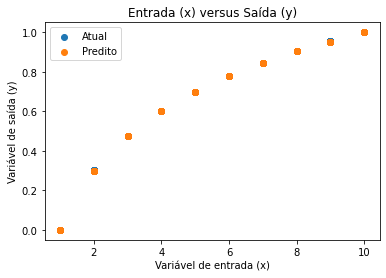

In [47]:
# plot x vs y
plt.scatter(x_plot,y_plot, label='Atual')

# plot x vs yhat
plt.scatter(x_plot,yhat_plot, label='Predito')

plt.title('Entrada (x) versus Saída (y)')
plt.xlabel('Variável de entrada (x)')
plt.ylabel('Variável de saída (y)')
plt.legend()
plt.show()

# Questão 3

## Dados

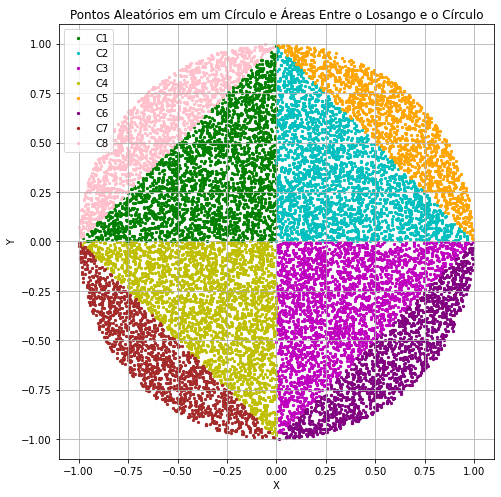

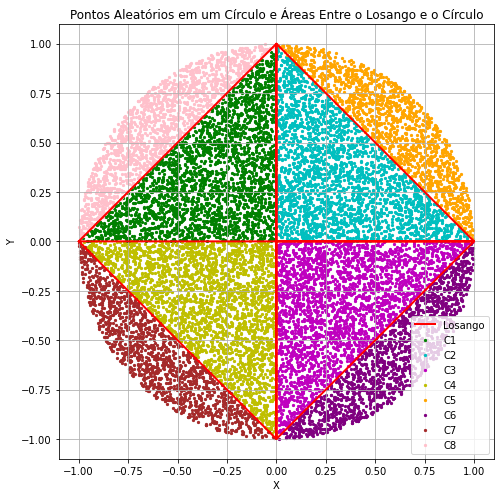

In [56]:
# Função para verificar se um ponto está dentro do losango
def dentro_do_losango(x, y):
    return abs(x) + abs(y) <= 1

# Função para verificar se um ponto está dentro do círculo
def dentro_do_circulo(x, y):
    return x**2 + y**2 <= 1

# Função para verificar se um ponto está dentro de um triângulo equilátero
def dentro_do_triangulo(x, y, x1, y1, x2, y2, x3, y3):
    def sign(p1, p2, p3):
        return (p1[0] - p3[0]) * (p2[1] - p3[1]) - (p2[0] - p3[0]) * (p1[1] - p3[1])

    b1 = sign((x, y), (x1, y1), (x2, y2)) < 0.0
    b2 = sign((x, y), (x2, y2), (x3, y3)) < 0.0
    b3 = sign((x, y), (x3, y3), (x1, y1)) < 0.0

    return (b1 == b2) and (b2 == b3)

# Gerar pontos aleatórios dentro do círculo para cada área
num_pontos_por_area = 2000
theta = np.random.uniform(0, 2 * np.pi, num_pontos_por_area * 8)
r = np.sqrt(np.random.uniform(0, 1, num_pontos_por_area * 8))
x = r * np.cos(theta)
y = r * np.sin(theta)

# Filtrar pontos dentro do círculo
x_circulo = x[dentro_do_circulo(x, y)]
y_circulo = y[dentro_do_circulo(x, y)]

# Filtrar pontos dentro do losango
x_dentro = x_circulo[dentro_do_losango(x_circulo, y_circulo)]
y_dentro = y_circulo[dentro_do_losango(x_circulo, y_circulo)]

# Dividir o losango em 4 triângulos equiláteros
x_losango = np.array([-1, 0, 1, 0])
y_losango = np.array([0, 1, 0, -1])
x_centro = np.mean(x_losango)
y_centro = np.mean(y_losango)

x_vertices = [x_centro, x_losango[0], x_losango[1], x_centro, x_losango[1], x_losango[2], x_centro, x_losango[2], x_losango[3], x_centro, x_losango[3], x_losango[0]]
y_vertices = [y_centro, y_losango[0], y_losango[1], y_centro, y_losango[1], y_losango[2], y_centro, y_losango[2], y_losango[3], y_centro, y_losango[3], y_losango[0]]

# Dividir as áreas entre o losango e o círculo
areas_dentro = [[] for _ in range(8)]
for i in range(4):
    x1, y1 = x_vertices[3*i], y_vertices[3*i]
    x2, y2 = x_vertices[3*i+1], y_vertices[3*i+1]
    x3, y3 = x_vertices[3*i+2], y_vertices[3*i+2]
    
    pontos_area = [(x_ponto, y_ponto) for x_ponto, y_ponto in zip(x_dentro, y_dentro) if dentro_do_triangulo(x_ponto, y_ponto, x1, y1, x2, y2, x3, y3)]
    areas_dentro[i] = pontos_area

# Pegar pontos restantes fora do losango
x_fora = x_circulo[~dentro_do_losango(x_circulo, y_circulo)]
y_fora = y_circulo[~dentro_do_losango(x_circulo, y_circulo)]

# Dividir as áreas fora do losango em 4 classes
areas_fora = {'C5': [], 'C6': [], 'C7': [], 'C8': []}
for i in range(len(x_fora)):
    if x_fora[i] >= 0 and y_fora[i] >= 0:
        areas_fora['C5'].append((x_fora[i], y_fora[i]))
    elif x_fora[i] >= 0 and y_fora[i] <= 0:
        areas_fora['C6'].append((x_fora[i], y_fora[i]))
    elif x_fora[i] <= 0 and y_fora[i] <= 0:
        areas_fora['C7'].append((x_fora[i], y_fora[i]))
    elif x_fora[i] <= 0 and y_fora[i] >= 0:
        areas_fora['C8'].append((x_fora[i], y_fora[i]))

# Visualizar os pontos e as áreas
plt.figure(figsize=(8, 8))

# Cores para as áreas entre o losango e o círculo
cores_dentro = ['g', 'c', 'm', 'y', 'orange', 'purple', 'brown', 'pink']
for i in range(8):
    if areas_dentro[i]:
        x_area, y_area = zip(*areas_dentro[i])
        plt.scatter(x_area, y_area, color=cores_dentro[i], label=f'C{i+1}', s=5)  # Corrigindo scatter()

# Cores para as áreas fora do losango
cores_fora = ['orange', 'purple', 'brown', 'pink']
for key in areas_fora:
    x_area, y_area = zip(*areas_fora[key])
    plt.scatter(x_area, y_area, color=cores_fora[int(key[1:]) - 5], label=key, s=5)

plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Pontos Aleatórios em um Círculo e Áreas Entre o Losango e o Círculo')
plt.grid(True)
plt.show()

# Visualizar os pontos e as áreas
plt.figure(figsize=(8, 8))
plt.plot(x_vertices, y_vertices, color='r', linestyle='-', linewidth=2, label='Losango')

# Cores para as áreas entre o losango e o círculo
cores_dentro = ['g', 'c', 'm', 'y', 'orange', 'purple', 'brown', 'pink']
for i in range(8):
    if areas_dentro[i]:
        x_area, y_area = zip(*areas_dentro[i])
        plt.scatter(x_area, y_area, color=cores_dentro[i], label=f'C{i+1}', s=5)  # Corrigindo scatter()

# Cores para as áreas fora do losango
cores_fora = ['orange', 'purple', 'brown', 'pink']
for key in areas_fora:
    x_area, y_area = zip(*areas_fora[key])
    plt.scatter(x_area, y_area, color=cores_fora[int(key[1:]) - 5], label=key, s=5)

plt.gca().set_aspect('equal', adjustable='box')
plt.legend()
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Pontos Aleatórios em um Círculo e Áreas Entre o Losango e o Círculo')
plt.grid(True)
plt.show()

## Dividir Conjunto Treinamento e Validação

In [57]:
# Criar dataset
dataset = []

# Adicionar pontos dentro do losango ao dataset com seus rótulos
for i, pontos_area in enumerate(areas_dentro):
    for ponto in pontos_area:
        dataset.append((ponto, f'c{i+1}'))

# Adicionar pontos fora do losango ao dataset com seus rótulos
for key, pontos_area in areas_fora.items():
    for ponto in pontos_area:
        dataset.append((ponto, key))

# Embaralhar o dataset
np.random.shuffle(dataset)

# Dividir dataset em entrada (X) e saída (Y)
X = [data[0] for data in dataset]
Y = [data[1] for data in dataset]

# Converter rótulos c1 até c8 para valores numéricos de 1 a 8
Y_numerico = [int(label[1:]) for label in Y]

# Dividir o conjunto de dados em treinamento e validação
X_treinamento, X_validacao, Y_treinamento, Y_validacao = train_test_split(X, Y_numerico, test_size=0.2, random_state=42)

# X_treinamento e Y_treinamento são seus dados de treinamento
# X_validacao e Y_validacao são seus dados de validação

print("Tamanho do conjunto de treinamento:", len(X_treinamento))
print("Tamanho do conjunto de validação:", len(X_validacao))

Tamanho do conjunto de treinamento: 12800
Tamanho do conjunto de validação: 3200


## Rede Convecional e Momento utilizando tensorflow e One-Hot encoding

In [58]:
# Função para converter rótulos para one-hot encoding
def convert_to_one_hot(y, num_classes):
    y_one_hot = np.zeros((len(y), num_classes))
    for i in range(len(y)):
        y_one_hot[i, y[i]-1] = 1
    return y_one_hot

# Converter rótulos para one-hot encoding
Y_one_hot_treinamento = convert_to_one_hot(Y_treinamento, 8)
Y_one_hot_validacao = convert_to_one_hot(Y_validacao, 8)

# Definir o modelo de Rede Neural com o algoritmo Delta Conventional
modelo_delta_convencional = tf.keras.models.Sequential([
    tf.keras.layers.Dense(50, activation='sigmoid', input_shape=(2,)),
    tf.keras.layers.Dense(8, activation='softmax')
])

# Definir o modelo de Rede Neural com o algoritmo Delta com Momentum
modelo_delta_momento = tf.keras.models.Sequential([
    tf.keras.layers.Dense(50, activation='sigmoid', input_shape=(2,)),
    tf.keras.layers.Dense(8, activation='softmax')
])

## Compilação e Treino do Modelo

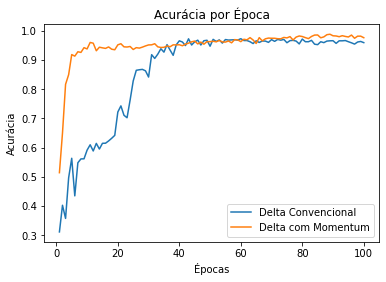

In [59]:
# Compilar os modelos
modelo_delta_convencional.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
modelo_delta_momento.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

# Treinar os modelos
epocas = 100
historico_delta_convencional = modelo_delta_convencional.fit(np.array(X_treinamento), Y_one_hot_treinamento, epochs=epocas, validation_data=(np.array(X_validacao), Y_one_hot_validacao), verbose=0)
historico_delta_momento = modelo_delta_momento.fit(np.array(X_treinamento), Y_one_hot_treinamento, epochs=epocas, validation_data=(np.array(X_validacao), Y_one_hot_validacao), verbose=0)

# Acessar as métricas de acurácia
acuracias_delta_convencional = historico_delta_convencional.history['val_accuracy']
acuracias_delta_momento = historico_delta_momento.history['val_accuracy']

# Plotar as acurácias por época
import matplotlib.pyplot as plt

plt.plot(range(1, epocas + 1), acuracias_delta_convencional, label='Delta Convencional')
plt.plot(range(1, epocas + 1), acuracias_delta_momento, label='Delta com Momentum')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.title('Acurácia por Época')
plt.legend()
plt.show()


## Matriz de Confusão

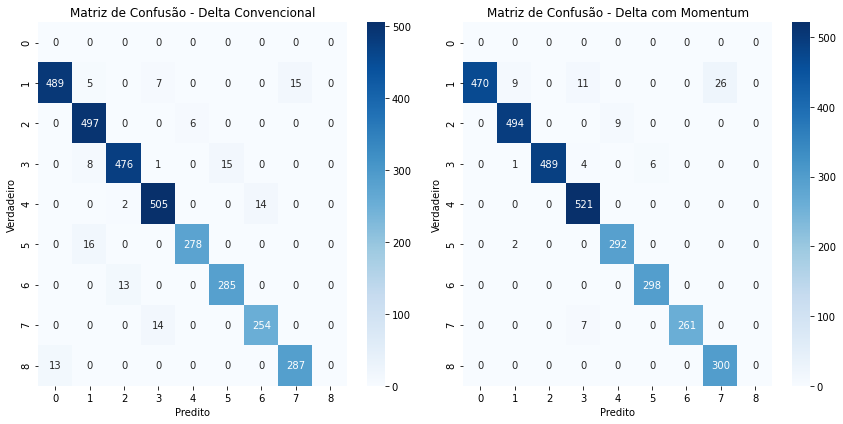

In [60]:
# Definir função para calcular a matriz de confusão
def calcular_matriz_confusao(modelo, X, y_true):
    y_pred = np.argmax(modelo.predict(X), axis=1)
    matriz_confusao = tf.math.confusion_matrix(y_true, y_pred)
    return matriz_confusao

# Calcular a matriz de confusão para o modelo Delta Convencional
matriz_confusao_delta_convencional = calcular_matriz_confusao(modelo_delta_convencional, np.array(X_validacao), Y_validacao)

# Calcular a matriz de confusão para o modelo Delta com Momentum
matriz_confusao_delta_momento = calcular_matriz_confusao(modelo_delta_momento, np.array(X_validacao), Y_validacao)

# Plotar as matrizes de confusão
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

sns.heatmap(matriz_confusao_delta_convencional, annot=True, cmap='Blues', fmt='g', ax=axs[0])
axs[0].set_title('Matriz de Confusão - Delta Convencional')
axs[0].set_xlabel('Predito')
axs[0].set_ylabel('Verdadeiro')

sns.heatmap(matriz_confusao_delta_momento, annot=True, cmap='Blues', fmt='g', ax=axs[1])
axs[1].set_title('Matriz de Confusão - Delta com Momentum')
axs[1].set_xlabel('Predito')
axs[1].set_ylabel('Verdadeiro')

plt.tight_layout()
plt.show()

# QUESTÃO 4

## Geração dos Dados

In [ ]:
def generate_data(start, end, step):
    return np.array([np.sin(n)**2 + np.cos(n + np.cos(n)) for n in np.arange(start, end, step)])

def prepare_data(data, window_size, horizon):
    X, y = [], []
    for i in range(len(data) - window_size - horizon + 1):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size:i+window_size+horizon])
    return np.array(X), np.array(y)

window_size = 10
horizon = 3
data_start = 0
data_end = 1000
data_step = 0.1
train_test_ratio = 0.8

data = generate_data(data_start, data_end, data_step)

X, y = prepare_data(data, window_size, horizon)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-train_test_ratio, shuffle=False)

## Compilação e Execução do Modelo

In [61]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(window_size,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(horizon)
])

model.compile(optimizer='adam', loss='mse')

model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=2)

y_pred = model.predict(X_test)

print("Erro de predição:")
for i in range(horizon):
    error = model.evaluate(X_test, y_test[:, i], verbose=0)
    print(f"Passo {i+1}: {error}")

Epoch 1/50
13/13 - 0s - loss: 0.9866
Epoch 2/50
13/13 - 0s - loss: 0.5638
Epoch 3/50
13/13 - 0s - loss: 0.3705
Epoch 4/50
13/13 - 0s - loss: 0.2348
Epoch 5/50
13/13 - 0s - loss: 0.1385
Epoch 6/50
13/13 - 0s - loss: 0.0759
Epoch 7/50
13/13 - 0s - loss: 0.0458
Epoch 8/50
13/13 - 0s - loss: 0.0287
Epoch 9/50
13/13 - 0s - loss: 0.0182
Epoch 10/50
13/13 - 0s - loss: 0.0121
Epoch 11/50
13/13 - 0s - loss: 0.0095
Epoch 12/50
13/13 - 0s - loss: 0.0081
Epoch 13/50
13/13 - 0s - loss: 0.0069
Epoch 14/50
13/13 - 0s - loss: 0.0060
Epoch 15/50
13/13 - 0s - loss: 0.0053
Epoch 16/50
13/13 - 0s - loss: 0.0049
Epoch 17/50
13/13 - 0s - loss: 0.0041
Epoch 18/50
13/13 - 0s - loss: 0.0037
Epoch 19/50
13/13 - 0s - loss: 0.0034
Epoch 20/50
13/13 - 0s - loss: 0.0031
Epoch 21/50
13/13 - 0s - loss: 0.0031
Epoch 22/50
13/13 - 0s - loss: 0.0037
Epoch 23/50
13/13 - 0s - loss: 0.0029
Epoch 24/50
13/13 - 0s - loss: 0.0025
Epoch 25/50
13/13 - 0s - loss: 0.0023
Epoch 26/50
13/13 - 0s - loss: 0.0023
Epoch 27/50
13/13 - 0

## Grafico dos Dados Gerados

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(np.arange(0, len(y_train)), y_train[:, 0], 'g', label='Data')

plt.xlabel('Dados (x)')
plt.ylabel('Valor (y)')

plt.legend()
plt.show()

## Grafico dos Dados Gerados Mais a Primeira Predição

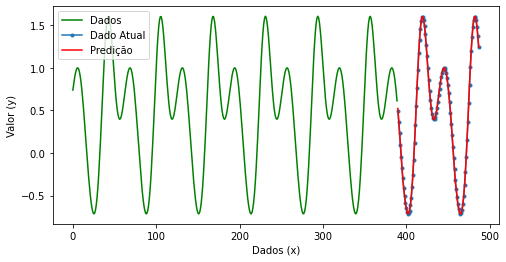

In [62]:
plt.figure(figsize=(8, 4))
plt.plot(np.arange(0, len(y_train)), y_train[:, 0], 'g', label='Dados')
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test[:, 0], marker='.', label='Dado Atual')
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred[:, 0], 'r', label='Predição')

plt.xlabel('Dados (x)')
plt.ylabel('Valor (y)')

plt.legend()
plt.show()

## Predição 1

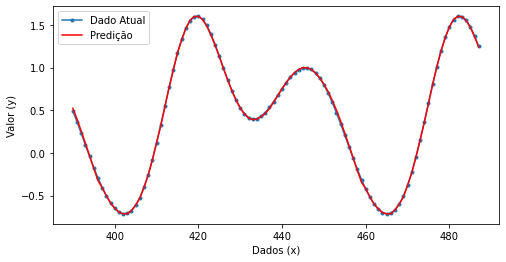

In [63]:
plt.figure(figsize=(8, 4))
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test[:, 0], marker='.', label='Dado Atual')
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred[:, 0], 'r', label='Predição')

plt.xlabel('Dados (x)')
plt.ylabel('Valor (y)')

plt.legend()
plt.show()

## Predições da 1 a 3

Erro de predição:
Passo 1: 0.021657615900039673
Passo 2: 0.009164984337985516
Passo 3: 0.023692237213253975


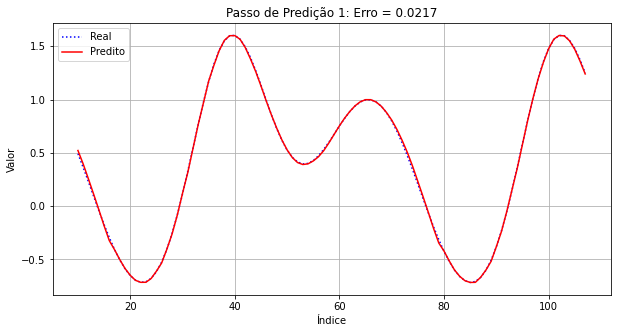

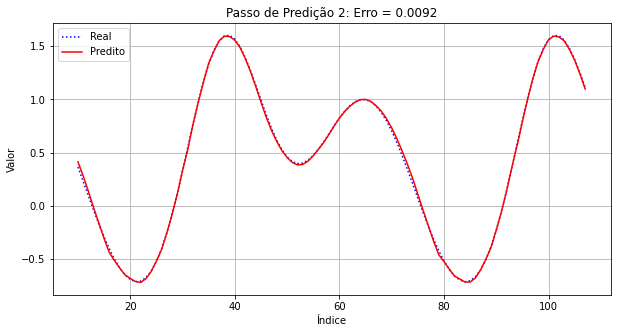

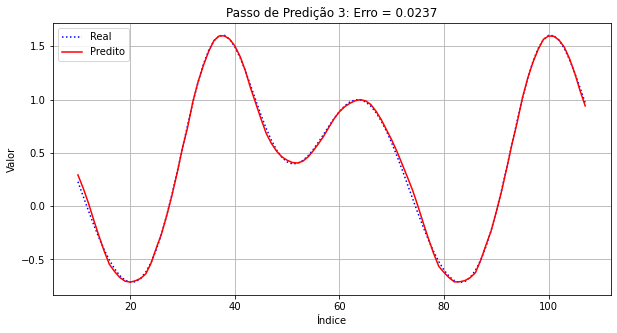

In [64]:
print("Erro de predição:")
errors = []
for i in range(horizon):
    error = model.evaluate(X_test, y_test[:, i], verbose=0)
    errors.append(error)
    print(f"Passo {i+1}: {error}")

for i in range(horizon):
    plt.figure(figsize=(10, 5))
    
    plt.plot(np.concatenate((np.full(window_size, np.nan), y_test[:, i])),
             label='Real', linestyle='dotted', color='blue')
    
    predicted = model.predict(X_test)[:, i]
    plt.plot(np.concatenate((np.full(window_size, np.nan), predicted)),
             label='Predito', color='red')
    
    plt.title(f'Passo de Predição {i+1}: Erro = {errors[i]:.4f}')
    plt.xlabel('Índice')
    plt.ylabel('Valor')
    plt.legend()
    plt.grid(True)
    plt.show()

